# 1. Pandas

- 정의 : 데이터 가공 및 분석을 위해 만들어진 Python 라이브러리
- Pandas라는 이름은 "Panel data"에서 유래함(개량경제학 용어로써 다차원의 구조화된 데이터셋을 다룸)
> balanced panel
![balanced panel](https://wikimedia.org/api/rest_v1/media/math/render/svg/de4ab9449dffb05244e681551e6f3ce710856ac6)
unbalanced panel
![unbalanced panel](https://wikimedia.org/api/rest_v1/media/math/render/svg/fad5580f0bc2deadc1a110b647dded40867600c0)

## 1.1 10 Minute to pandas (http://pandas.pydata.org/pandas-docs/stable/10min.html)
 - Object 생성([Object Creation](http://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation))
 - 데이터 조회([Viewing Data](http://pandas.pydata.org/pandas-docs/stable/10min.html#viewing-data))
 - 데이터 선택([Selection](http://pandas.pydata.org/pandas-docs/stable/10min.html#selection))
     - Selection by Label
     - Selection by Position
     - Boolean Indexing
     - Setting
 - 누락 데이터([Missing Data](http://pandas.pydata.org/pandas-docs/stable/10min.html#missing-data))
 - Pandas 계산([Operations](http://pandas.pydata.org/pandas-docs/stable/10min.html#operations))
     - Stats
     - Apply
     - Histogramming
     - String Methods
 - 병합([Merge](http://pandas.pydata.org/pandas-docs/stable/10min.html#merge))
     - Concat
     - Join
     - Append
 - 그룹화([Grouping](http://pandas.pydata.org/pandas-docs/stable/10min.html#grouping))
 - 변형([Reshaping](http://pandas.pydata.org/pandas-docs/stable/10min.html#reshaping))
     - Stack
     - Pivot Tables
 - 시계열([Time Series](http://pandas.pydata.org/pandas-docs/stable/10min.html#time-series))
 - 분류([Categoricals](http://pandas.pydata.org/pandas-docs/stable/10min.html#categoricals))
 - 그래프([Plotting](http://pandas.pydata.org/pandas-docs/stable/10min.html#plotting))
 - 데이터 입출력([Getting Data in/out](http://pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out))
 - [Gotchas](http://pandas.pydata.org/pandas-docs/stable/10min.html#gotchas)

### 1.1.1 Object 생성

In [59]:
import pandas as pd
import numpy as np
s = pd.Series([1,3,5,np.nan,6,8])
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

### 1.1.2 데이터 조회

#### 1.1.2.1 처음과 끝 조회

In [60]:
df.head()

,A,B,C,D
2013-01-01,-2.328059,0.297009,0.130654,-0.661773
2013-01-02,0.068961,-0.102853,0.214349,1.137403
2013-01-03,0.275312,-1.140510,-0.400254,0.515890
2013-01-04,-1.197599,0.739873,-1.009280,0.218141
2013-01-05,-0.299502,0.956948,-1.046370,2.162167


In [61]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.197599,0.739873,-1.009280,0.218141
2013-01-05,-0.299502,0.956948,-1.046370,2.162167
2013-01-06,-0.242780,-0.016623,-0.541045,0.257147


#### 1.1.2.2 인덱스, 컬럼, 값 조회

In [62]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [63]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [64]:
df.values

array([[-2.32805921,  0.29700896,  0.13065387, -0.66177254],
       [ 0.06896149, -0.10285273,  0.21434907,  1.13740321],
       [ 0.27531191, -1.14050954, -0.40025371,  0.51589004],
       [-1.19759935,  0.73987308, -1.0092796 ,  0.21814124],
       [-0.29950177,  0.95694758, -1.04636955,  2.16216697],
       [-0.24277998, -0.01662258, -0.54104538,  0.25714681]])

#### 1.1.2.3 통계 데이터, 변환, 정렬

In [65]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.620611,0.122307,-0.441991,0.604829
std,0.976970,0.744747,0.539879,0.958284
min,-2.328059,-1.140510,-1.046370,-0.661773
25%,-0.973075,-0.081295,-0.892221,0.227893
50%,-0.271141,0.140193,-0.470650,0.386518
75%,-0.008974,0.629157,-0.002073,0.982025
max,0.275312,0.956948,0.214349,2.162167


In [66]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-2.328059,0.068961,0.275312,-1.197599,-0.299502,-0.242780
B,0.297009,-0.102853,-1.140510,0.739873,0.956948,-0.016623
C,0.130654,0.214349,-0.400254,-1.009280,-1.046370,-0.541045
D,-0.661773,1.137403,0.515890,0.218141,2.162167,0.257147


In [67]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.661773,0.130654,0.297009,-2.328059
2013-01-02,1.137403,0.214349,-0.102853,0.068961
2013-01-03,0.515890,-0.400254,-1.140510,0.275312
2013-01-04,0.218141,-1.009280,0.739873,-1.197599
2013-01-05,2.162167,-1.046370,0.956948,-0.299502
2013-01-06,0.257147,-0.541045,-0.016623,-0.242780


In [68]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.275312,-1.140510,-0.400254,0.515890
2013-01-02,0.068961,-0.102853,0.214349,1.137403
2013-01-06,-0.242780,-0.016623,-0.541045,0.257147
2013-01-01,-2.328059,0.297009,0.130654,-0.661773
2013-01-04,-1.197599,0.739873,-1.009280,0.218141
2013-01-05,-0.299502,0.956948,-1.046370,2.162167


### 1.1.3 선택
#### 1.1.3.1 List 표현

In [69]:
df['A']

2013-01-01   -2.328059
2013-01-02    0.068961
2013-01-03    0.275312
2013-01-04   -1.197599
2013-01-05   -0.299502
2013-01-06   -0.242780
Freq: D, Name: A, dtype: float64

In [70]:
df[0:3]

,A,B,C,D
2013-01-01,-2.328059,0.297009,0.130654,-0.661773
2013-01-02,0.068961,-0.102853,0.214349,1.137403
2013-01-03,0.275312,-1.140510,-0.400254,0.515890


In [71]:
df['2013-01-02':'2013-01-03']

,A,B,C,D
2013-01-02,0.068961,-0.102853,0.214349,1.137403
2013-01-03,0.275312,-1.140510,-0.400254,0.515890


#### 1.1.3.2 Label 을 이용한 표현

In [72]:
df.loc[dates[0]]

A   -2.328059
B    0.297009
C    0.130654
D   -0.661773
Name: 2013-01-01 00:00:00, dtype: float64

In [73]:
df.loc['2013-01-02']

A    0.068961
B   -0.102853
C    0.214349
D    1.137403
Name: 2013-01-02 00:00:00, dtype: float64

In [74]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,-2.328059,0.297009
2013-01-02,0.068961,-0.102853
2013-01-03,0.275312,-1.140510
2013-01-04,-1.197599,0.739873
2013-01-05,-0.299502,0.956948
2013-01-06,-0.242780,-0.016623


In [75]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.068961,-0.102853
2013-01-03,0.275312,-1.140510
2013-01-04,-1.197599,0.739873


In [76]:
df.loc['20130102',['A','B']]

A    0.068961
B   -0.102853
Name: 2013-01-02 00:00:00, dtype: float64

In [77]:
df.loc[dates[0],'A']

-2.328059208168034

아래가 좀더 빠르다

In [78]:
df.at[dates[0],'A']

-2.328059208168034

#### 1.1.3.3 위치를 이용한 표현

In [79]:
df.iloc[3]

A   -1.197599
B    0.739873
C   -1.009280
D    0.218141
Name: 2013-01-04 00:00:00, dtype: float64

In [80]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.197599,0.739873
2013-01-05,-0.299502,0.956948


In [81]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.068961,0.214349
2013-01-03,0.275312,-0.400254
2013-01-05,-0.299502,-1.046370


In [82]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.068961,-0.102853,0.214349,1.137403
2013-01-03,0.275312,-1.140510,-0.400254,0.515890


In [83]:
 df.iloc[:,1:3]

,B,C
2013-01-01,0.297009,0.130654
2013-01-02,-0.102853,0.214349
2013-01-03,-1.140510,-0.400254
2013-01-04,0.739873,-1.009280
2013-01-05,0.956948,-1.046370
2013-01-06,-0.016623,-0.541045


In [84]:
df.iloc[1,1]

-0.10285272569200217

아래가 더 빠르다

In [85]:
df.iat[1,1]

-0.10285272569200217

#### 1.1.3.4 조건식을 이용

In [86]:
df[df.A>0]

,A,B,C,D
2013-01-02,0.068961,-0.102853,0.214349,1.137403
2013-01-03,0.275312,-1.140510,-0.400254,0.515890


In [87]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.297009,0.130654,NaN
2013-01-02,0.068961,NaN,0.214349,1.137403
2013-01-03,0.275312,NaN,NaN,0.515890
2013-01-04,NaN,0.739873,NaN,0.218141
2013-01-05,NaN,0.956948,NaN,2.162167
2013-01-06,NaN,NaN,NaN,0.257147


In [88]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

In [89]:
df2

,A,B,C,D,E
2013-01-01,-2.328059,0.297009,0.130654,-0.661773,one
2013-01-02,0.068961,-0.102853,0.214349,1.137403,one
2013-01-03,0.275312,-1.140510,-0.400254,0.515890,two
2013-01-04,-1.197599,0.739873,-1.009280,0.218141,three
2013-01-05,-0.299502,0.956948,-1.046370,2.162167,four
2013-01-06,-0.242780,-0.016623,-0.541045,0.257147,three


In [90]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.275312,-1.140510,-0.400254,0.515890,two
2013-01-05,-0.299502,0.956948,-1.046370,2.162167,four


#### 1.1.3.5 Setting

In [91]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [92]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [93]:
df['F'] = s1

In [94]:
df.at[dates[0], 'A'] = 0

In [95]:
df.iat[0,1] = 0

In [96]:
df.loc[:,'D'] = np.array([5]* len(df))

In [97]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.130654,5,NaN
2013-01-02,0.068961,-0.102853,0.214349,5,1.0
2013-01-03,0.275312,-1.140510,-0.400254,5,2.0
2013-01-04,-1.197599,0.739873,-1.009280,5,3.0
2013-01-05,-0.299502,0.956948,-1.046370,5,4.0
2013-01-06,-0.242780,-0.016623,-0.541045,5,5.0


In [98]:
df2 = df.copy()
df2[df2>0] = -df2

In [99]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.130654,-5,NaN
2013-01-02,-0.068961,-0.102853,-0.214349,-5,-1.0
2013-01-03,-0.275312,-1.140510,-0.400254,-5,-2.0
2013-01-04,-1.197599,-0.739873,-1.009280,-5,-3.0
2013-01-05,-0.299502,-0.956948,-1.046370,-5,-4.0
2013-01-06,-0.242780,-0.016623,-0.541045,-5,-5.0


### 1.1.4 누락 데이터

In [100]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+ ['E'])

In [101]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.130654,5,NaN,NaN
2013-01-02,0.068961,-0.102853,0.214349,5,1.0,NaN
2013-01-03,0.275312,-1.140510,-0.400254,5,2.0,NaN
2013-01-04,-1.197599,0.739873,-1.009280,5,3.0,NaN


In [102]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [103]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.130654,5,NaN,1.0
2013-01-02,0.068961,-0.102853,0.214349,5,1.0,1.0
2013-01-03,0.275312,-1.140510,-0.400254,5,2.0,NaN
2013-01-04,-1.197599,0.739873,-1.009280,5,3.0,NaN


In [104]:
# NaN 항목 지우기
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.068961,-0.102853,0.214349,5,1.0,1.0


In [105]:
#채우기
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.130654,5,5.0,1.0
2013-01-02,0.068961,-0.102853,0.214349,5,1.0,1.0
2013-01-03,0.275312,-1.140510,-0.400254,5,2.0,5.0
2013-01-04,-1.197599,0.739873,-1.009280,5,3.0,5.0


In [106]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 1.1.5 연산자
#### 1.1.5.1 통계

In [107]:
#컬럼별 평균
df.mean()

A   -0.232601
B    0.072806
C   -0.441991
D    5.000000
F    3.000000
dtype: float64

In [108]:
#Index 별 평균
df.mean(1)

2013-01-01    1.282663
2013-01-02    1.236092
2013-01-03    1.146910
2013-01-04    1.306599
2013-01-05    1.722215
2013-01-06    1.839910
Freq: D, dtype: float64

In [109]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [110]:
pd.Series([1,3,5,np.nan,6,8], index=dates)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [111]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.724688,-2.140510,-1.400254,4.0,1.0
2013-01-04,-4.197599,-2.260127,-4.009280,2.0,0.0
2013-01-05,-5.299502,-4.043052,-6.046370,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [112]:
df.sub(s, axis='index').dropna()

,A,B,C,D,F
2013-01-03,-0.724688,-2.140510,-1.400254,4.0,1.0
2013-01-04,-4.197599,-2.260127,-4.009280,2.0,0.0
2013-01-05,-5.299502,-4.043052,-6.046370,0.0,-1.0


#### 1.1.5.2 Apply

In [114]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.130654,5,NaN
2013-01-02,0.068961,-0.102853,0.214349,5,1.0
2013-01-03,0.275312,-1.140510,-0.400254,5,2.0
2013-01-04,-1.197599,0.739873,-1.009280,5,3.0
2013-01-05,-0.299502,0.956948,-1.046370,5,4.0
2013-01-06,-0.242780,-0.016623,-0.541045,5,5.0


In [115]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.130654,5,NaN
2013-01-02,0.068961,-0.102853,0.345003,10,1.0
2013-01-03,0.344273,-1.243362,-0.055251,15,3.0
2013-01-04,-0.853326,-0.503489,-1.064530,20,6.0
2013-01-05,-1.152828,0.453458,-2.110900,25,10.0
2013-01-06,-1.395608,0.436836,-2.651945,30,15.0


In [116]:
df.apply(lambda x:x.max() - x.min())

A    1.472911
B    2.097457
C    1.260719
D    0.000000
F    4.000000
dtype: float64

#### 1.1.5.3 Historamming

In [117]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [118]:
s

0    3
1    0
2    5
3    6
4    0
5    4
6    2
7    3
8    1
9    0
dtype: int32

In [119]:
#값별 빈도수 
s.value_counts()

0    3
3    2
6    1
5    1
4    1
2    1
1    1
dtype: int64

#### 1.1.5.4 문자열 함수

In [120]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [121]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 1.1.6 병합

#### 1.1.6.1 Concat

In [122]:
df = pd.DataFrame(np.random.randn(10,4))

In [123]:
df

,0,1,2,3
0,0.437351,-2.505223,1.078902,-0.655534
1,-0.917378,-1.236615,1.171250,0.663209
2,-0.092449,-0.653837,-0.596762,1.275968
3,-0.750969,-0.946947,-0.128522,0.156593
4,-0.849665,-0.443966,1.451677,-0.579664
5,-1.247865,0.107196,-1.095620,1.152598
6,-0.277200,1.426482,1.600131,1.093791
7,0.647650,-0.348740,-1.030609,0.123343
8,1.713186,-0.146015,-0.078590,0.163573
9,0.376598,-0.321273,1.214688,0.845784


In [124]:
pieces = [df[:3], df[3:7],df[7:]]

In [125]:
pd.concat(pieces)

,0,1,2,3
0,0.437351,-2.505223,1.078902,-0.655534
1,-0.917378,-1.236615,1.171250,0.663209
2,-0.092449,-0.653837,-0.596762,1.275968
3,-0.750969,-0.946947,-0.128522,0.156593
4,-0.849665,-0.443966,1.451677,-0.579664
5,-1.247865,0.107196,-1.095620,1.152598
6,-0.277200,1.426482,1.600131,1.093791
7,0.647650,-0.348740,-1.030609,0.123343
8,1.713186,-0.146015,-0.078590,0.163573
9,0.376598,-0.321273,1.214688,0.845784


#### 1.1.6.2 join

In [126]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [127]:
left

,key,lval
0,foo,1
1,foo,2


In [128]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [129]:
right

,key,rval
0,foo,4
1,foo,5


In [130]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### 1.1.6.3 Append

In [131]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [132]:
df

,A,B,C,D
0,-0.173586,-0.685364,-1.575804,0.640609
1,-0.075456,1.701383,-0.583597,1.304042
2,0.602742,-0.562650,1.362339,-0.044354
3,-0.262211,0.769052,-1.398274,-1.555068
4,0.096463,0.809712,-0.922647,1.459758
5,0.288196,1.136738,-1.849978,0.262021
6,-0.469959,0.400977,0.292678,-0.110822
7,-2.096250,-0.896124,-0.027674,0.805927


In [133]:
s = df.iloc[3]

In [134]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.173586,-0.685364,-1.575804,0.640609
1,-0.075456,1.701383,-0.583597,1.304042
2,0.602742,-0.562650,1.362339,-0.044354
3,-0.262211,0.769052,-1.398274,-1.555068
4,0.096463,0.809712,-0.922647,1.459758
5,0.288196,1.136738,-1.849978,0.262021
6,-0.469959,0.400977,0.292678,-0.110822
7,-2.096250,-0.896124,-0.027674,0.805927
8,-0.262211,0.769052,-1.398274,-1.555068


### 1.1.7 그룹핑

In [135]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

In [136]:
df

,A,B,C,D
0,foo,one,0.112586,-1.131186
1,bar,one,0.333331,0.098309
2,foo,two,-0.869694,-2.742334
3,bar,three,-0.097422,-0.202876
4,foo,two,0.539815,0.667544
5,bar,two,-0.465934,1.333051
6,foo,one,-0.482760,0.281359
7,foo,three,1.222011,0.304097


In [137]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.230026,1.228484
foo,0.521959,-2.620519


In [138]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.333331  0.098309
    three -0.097422 -0.202876
    two   -0.465934  1.333051
foo one   -0.370174 -0.849827
    three  1.222011  0.304097
    two   -0.329878 -2.074790

### 1.1.8 변형

#### 1.1.8.1 스택

In [139]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [140]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [141]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [142]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [143]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [144]:
df2 = df[:4]

In [145]:
df2

A         B
first second                    
bar   one     0.645163  1.405926
      two    -2.124382  0.794372
baz   one    -0.629274 -0.305541
      two    -1.112021 -1.304673

In [146]:
#colume 을 index화 
stacked = df2.stack()

In [147]:
stacked

first  second   
bar    one     A    0.645163
               B    1.405926
       two     A   -2.124382
               B    0.794372
baz    one     A   -0.629274
               B   -0.305541
       two     A   -1.112021
               B   -1.304673
dtype: float64

In [148]:
type(stacked)

pandas.core.series.Series

In [149]:
stacked.index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two'], ['A', 'B']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second', None])

In [150]:
type(stacked.unstack())

pandas.core.frame.DataFrame

In [151]:
stacked

first  second   
bar    one     A    0.645163
               B    1.405926
       two     A   -2.124382
               B    0.794372
baz    one     A   -0.629274
               B   -0.305541
       two     A   -1.112021
               B   -1.304673
dtype: float64

In [152]:
stacked.unstack()

A         B
first second                    
bar   one     0.645163  1.405926
      two    -2.124382  0.794372
baz   one    -0.629274 -0.305541
      two    -1.112021 -1.304673

In [153]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.645163 -2.124382
      B  1.405926  0.794372
baz   A -0.629274 -1.112021
      B -0.305541 -1.304673

In [154]:
stacked.unstack(2)

A         B
first second                    
bar   one     0.645163  1.405926
      two    -2.124382  0.794372
baz   one    -0.629274 -0.305541
      two    -1.112021 -1.304673

#### 1.1.8.2 피벗테이블

In [155]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [156]:
df

,A,B,C,D,E
0,one,A,foo,2.163510,-0.087261
1,one,B,foo,1.401198,1.274182
2,two,C,foo,0.745375,0.231181
3,three,A,bar,0.250735,-1.039610
4,one,B,bar,-0.360911,0.082829
5,one,C,bar,0.186144,3.043790
6,two,A,foo,-1.463334,1.004466
7,three,B,foo,-0.746738,0.705609
8,one,C,foo,0.845246,1.487897
9,one,A,bar,1.303617,0.175048


In [157]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.303617  2.163510
      B -0.360911  1.401198
      C  0.186144  0.845246
three A  0.250735       NaN
      B       NaN -0.746738
      C  0.876890       NaN
two   A       NaN -1.463334
      B -1.483091       NaN
      C       NaN  0.745375

### 1.1.9 시계열

In [158]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [159]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)

In [160]:
ts.resample('5Min').sum()

2012-01-01    23786
Freq: 5T, dtype: int32

In [161]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [162]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [163]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [164]:
ts

2012-03-06   -0.093021
2012-03-07    0.854329
2012-03-08    1.441791
2012-03-09   -0.010130
2012-03-10   -0.939063
Freq: D, dtype: float64

In [165]:
ts_utc = ts.tz_localize('UTC')

In [166]:
ts_utc

2012-03-06 00:00:00+00:00   -0.093021
2012-03-07 00:00:00+00:00    0.854329
2012-03-08 00:00:00+00:00    1.441791
2012-03-09 00:00:00+00:00   -0.010130
2012-03-10 00:00:00+00:00   -0.939063
Freq: D, dtype: float64

In [167]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.093021
2012-03-06 19:00:00-05:00    0.854329
2012-03-07 19:00:00-05:00    1.441791
2012-03-08 19:00:00-05:00   -0.010130
2012-03-09 19:00:00-05:00   -0.939063
Freq: D, dtype: float64

In [168]:
rng = pd.date_range('1/1/2012', periods=5, freq = 'M')

In [169]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [170]:
ts

2012-01-31    1.184489
2012-02-29   -0.805105
2012-03-31   -0.689473
2012-04-30    0.164486
2012-05-31   -0.870816
Freq: M, dtype: float64

In [171]:
ps = ts.to_period()

In [172]:
ps

2012-01    1.184489
2012-02   -0.805105
2012-03   -0.689473
2012-04    0.164486
2012-05   -0.870816
Freq: M, dtype: float64

In [173]:
ps.to_timestamp()

2012-01-01    1.184489
2012-02-01   -0.805105
2012-03-01   -0.689473
2012-04-01    0.164486
2012-05-01   -0.870816
Freq: MS, dtype: float64

In [174]:
 prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [175]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [176]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [177]:
ts.head()

1990-03-01 09:00   -0.398261
1990-06-01 09:00    0.108307
1990-09-01 09:00   -1.201678
1990-12-01 09:00   -0.136732
1991-03-01 09:00    1.151489
Freq: H, dtype: float64

### 1.1.10 분류

In [178]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [179]:
df["grade"] = df["raw_grade"].astype("category")

In [180]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [181]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [182]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [183]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [184]:
df.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

In [185]:
df.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [186]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

In [187]:
df.groupby("grade")

### 1.1.11 그래프

In [188]:
import matplotlib.pyplot as plt

In [189]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [190]:
ts = ts.cumsum()

In [191]:
ts.plot()

In [192]:
plt.figure()

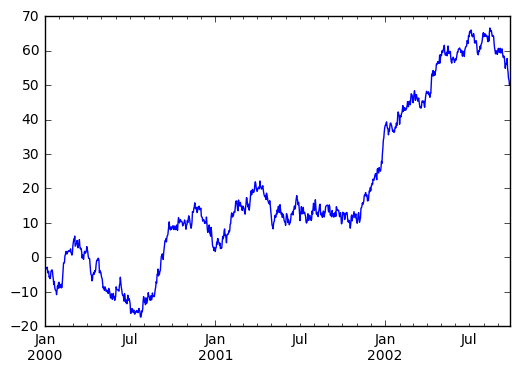

In [193]:
plt.show()

In [194]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [195]:
df = df.cumsum()

In [196]:
plt.figure()

In [197]:
df.plot()

In [198]:
plt.legend(loc='best')

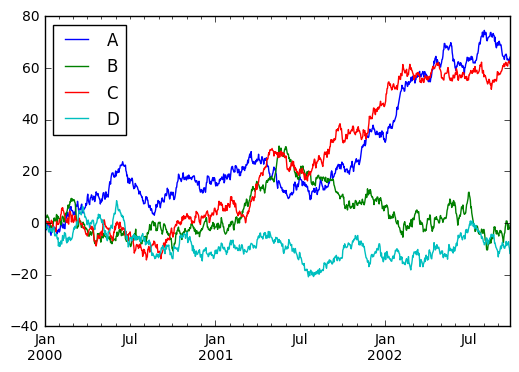

In [199]:
plt.show()

### 1.1.12 데이터 입출력

In [200]:
df.to_csv('foo.csv')

In [201]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.953269,1.059402,-0.095953,-0.329493
1,2000-01-02,-3.056335,0.777558,-0.368448,-0.873706
2,2000-01-03,-2.588574,2.213147,-0.086678,-0.126194
3,2000-01-04,-2.552363,2.423185,0.721729,-0.794898
4,2000-01-05,-2.195377,2.096079,0.094881,-2.139154
5,2000-01-06,-1.637314,3.064424,0.032646,-1.227146
6,2000-01-07,-0.106115,2.558711,0.549378,-1.938933
7,2000-01-08,0.129455,2.268851,-0.524390,-2.463866
8,2000-01-09,0.420358,1.994828,0.420067,-3.504329
9,2000-01-10,-1.167474,0.714764,-0.512853,-3.137983


In [202]:
df.to_json('foo.json')

In [203]:
pd.read_json('foo.json')

,A,B,C,D
2001-09-10,17.279952,16.674955,31.308759,-15.733963
2001-09-11,17.789326,16.980980,31.157326,-14.861080
2001-09-12,17.758769,16.276473,31.383413,-13.904095
2001-09-13,18.019521,14.705849,32.577115,-15.127986
2001-09-14,19.004999,14.260045,32.062243,-13.340268
2001-09-15,18.998620,13.451159,32.562019,-13.577596
2001-09-16,19.396521,12.628485,32.230750,-13.027771
2001-09-17,20.869809,11.956270,33.800403,-13.303721
2001-09-18,21.178520,12.032346,36.017828,-12.546067
2001-09-19,20.639850,12.053575,35.683825,-13.506099


In [204]:
df.to_hdf('foo.h5', 'df')

In [205]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.953269,1.059402,-0.095953,-0.329493
2000-01-02,-3.056335,0.777558,-0.368448,-0.873706
2000-01-03,-2.588574,2.213147,-0.086678,-0.126194
2000-01-04,-2.552363,2.423185,0.721729,-0.794898
2000-01-05,-2.195377,2.096079,0.094881,-2.139154
2000-01-06,-1.637314,3.064424,0.032646,-1.227146
2000-01-07,-0.106115,2.558711,0.549378,-1.938933
2000-01-08,0.129455,2.268851,-0.524390,-2.463866
2000-01-09,0.420358,1.994828,0.420067,-3.504329
2000-01-10,-1.167474,0.714764,-0.512853,-3.137983


In [206]:
df.to_pickle('foo.pic')

In [207]:
pd.read_pickle('foo.pic')

,A,B,C,D
2000-01-01,-1.953269,1.059402,-0.095953,-0.329493
2000-01-02,-3.056335,0.777558,-0.368448,-0.873706
2000-01-03,-2.588574,2.213147,-0.086678,-0.126194
2000-01-04,-2.552363,2.423185,0.721729,-0.794898
2000-01-05,-2.195377,2.096079,0.094881,-2.139154
2000-01-06,-1.637314,3.064424,0.032646,-1.227146
2000-01-07,-0.106115,2.558711,0.549378,-1.938933
2000-01-08,0.129455,2.268851,-0.524390,-2.463866
2000-01-09,0.420358,1.994828,0.420067,-3.504329
2000-01-10,-1.167474,0.714764,-0.512853,-3.137983


In [208]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [209]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-1.953269,1.059402,-0.095953,-0.329493
2000-01-02,-3.056335,0.777558,-0.368448,-0.873706
2000-01-03,-2.588574,2.213147,-0.086678,-0.126194
2000-01-04,-2.552363,2.423185,0.721729,-0.794898
2000-01-05,-2.195377,2.096079,0.094881,-2.139154
2000-01-06,-1.637314,3.064424,0.032646,-1.227146
2000-01-07,-0.106115,2.558711,0.549378,-1.938933
2000-01-08,0.129455,2.268851,-0.524390,-2.463866
2000-01-09,0.420358,1.994828,0.420067,-3.504329
2000-01-10,-1.167474,0.714764,-0.512853,-3.137983


#### 용량비교 : 

In [210]:
!dir foo*

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: ACC2-708C

 c:\github\Study_py 디렉터리

2017-03-29  오전 09:37            87,438 foo.csv
2017-03-29  오전 09:37            47,384 foo.h5
2017-03-29  오전 09:37           116,796 foo.json
2017-03-29  오전 09:37            40,925 foo.pic
2017-03-29  오전 09:37            67,960 foo.xlsx
               5개 파일             360,503 바이트
               0개 디렉터리  159,629,914,112 바이트 남음


### Gotchas

In [211]:
if pd.Series([False, True, False]) is not None:
    print("I was not None")

I was not None


In [212]:
if pd.Series([False, True, False]).any():
    print("I am any")

I am any


In [213]:
pd.Series([True]).bool()

True

In [214]:
pd.Series([False]).bool()

False

In [215]:
pd.DataFrame([[True]]).bool()

True

In [216]:
pd.DataFrame([[False]]).bool()

False

## 1.2 전체 API 목록

http://pandas.pydata.org/pandas-docs/stable/api.html

## 주식 데이터 표현 예제

In [217]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime
import matplotlib.pyplot as plt

CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-01-01', datetime.datetime.now())

df['MA_5'] = df['Adj Close'].rolling(window=5, center=False).mean()
df['MA_20'] = df['Adj Close'].rolling(window=20, center=False).mean()
df['diff'] = df['MA_5'] - df['MA_20']

In [218]:
fig = plt.gcf()
fig.set_size_inches(16,8)

#price(가격)
price_chart = plt.subplot2grid((4,1),(0,0),rowspan=2)
price_chart.plot(df.index, df['Adj Close'], label = 'Adj Close')
price_chart.plot(df.index, df['MA_5'], label = 'MA_5')
price_chart.plot(df.index, df['MA_20'], label = 'MA_20')

plt.title("Samsung 2017")
plt.legend(loc='best')

vol_chart = plt.subplot2grid((4,1),(2,0), rowspan = 1)
vol_chart.bar(df.index, df['Volume'], color = 'c')

signal_chart = plt.subplot2grid((4,1), (3,0), rowspan=1)
signal_chart.plot(df.index, df['diff'].fillna(0), color = 'g')
plt.axhline(y=0, linestyle = '--', color = 'k')

prev_key = prev_val = 0
for key, val in df['diff'][1:].iteritems():
    if val == 0:
        continue
    elif val * prev_val < 0 and val > prev_val:
        print('GOLD', key, val)
        price_chart.annotate('Golden', xy = (key, df['MA_20'][key]), xytext=(10,-30), 
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
        signal_chart.annotate('BUY', xy = (key, df['diff'][key]), xytext=(10,-30),
                              textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))        
    elif val * prev_val < 0 and val < prev_val:
        print('DEAD', key, val)
        price_chart.annotate('Dead', xy = (key, df['MA_20'][key]), xytext=(10,30),
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
        signal_chart.annotate('Sell', xy = (key, df['diff'][key]), xytext=(10,30),
                             textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    prev_key, prev_val = key, val


DEAD 2017-02-13 00:00:00 -12600.0
GOLD 2017-02-24 00:00:00 7300.0
DEAD 2017-03-01 00:00:00 -3450.0
GOLD 2017-03-02 00:00:00 1050.0


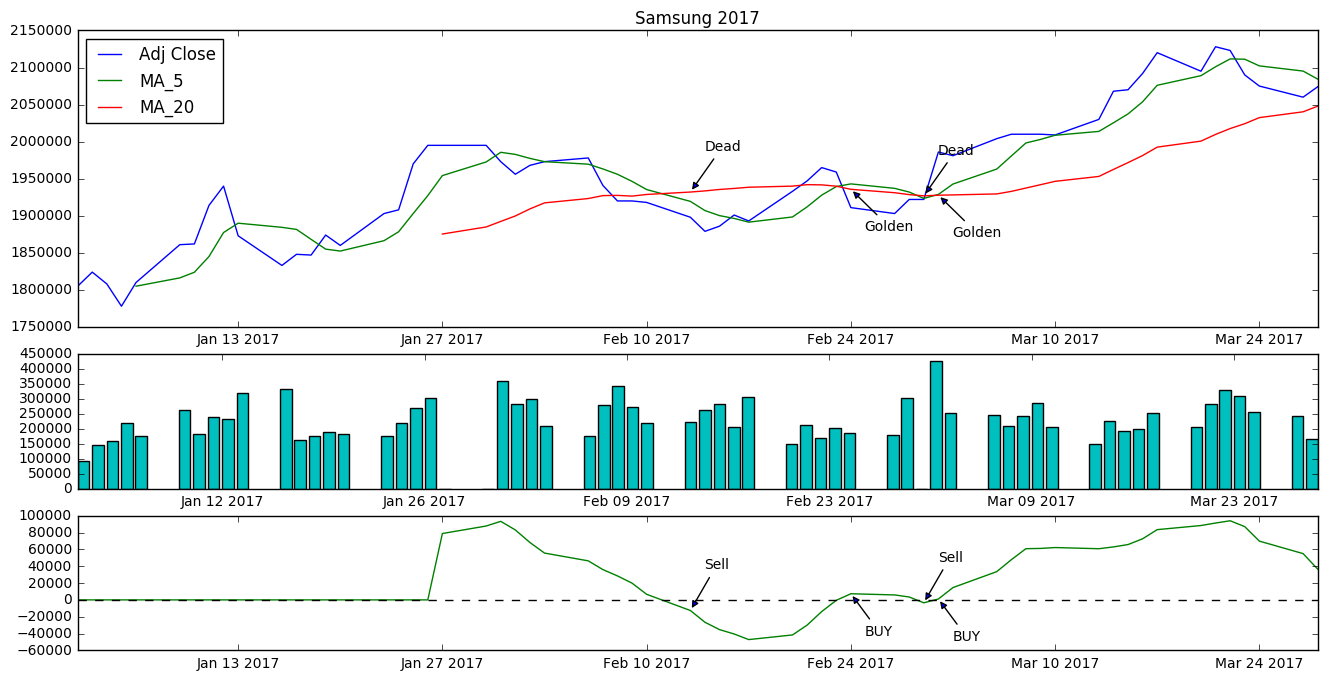

In [219]:
plt.show()

In [220]:
import pandas as pd
import pandas_datareader.data
import requests
import datetime
import matplotlib.pyplot as plt

CODE='005930.KS'
df = pandas_datareader.data.DataReader(CODE, "yahoo", '2017-01-01', datetime.datetime.now())

In [221]:
df.tail(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-24,2080000.0,2099000.0,2054000.0,2075000.0,256100,2075000.0
2017-03-27,2060000.0,2094000.0,2059000.0,2060000.0,243500,2060000.0
2017-03-28,2078000.0,2092000.0,2069000.0,2074000.0,164300,2074000.0


In [222]:
plt.show()